The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [1]:
import tensorflow as tf

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

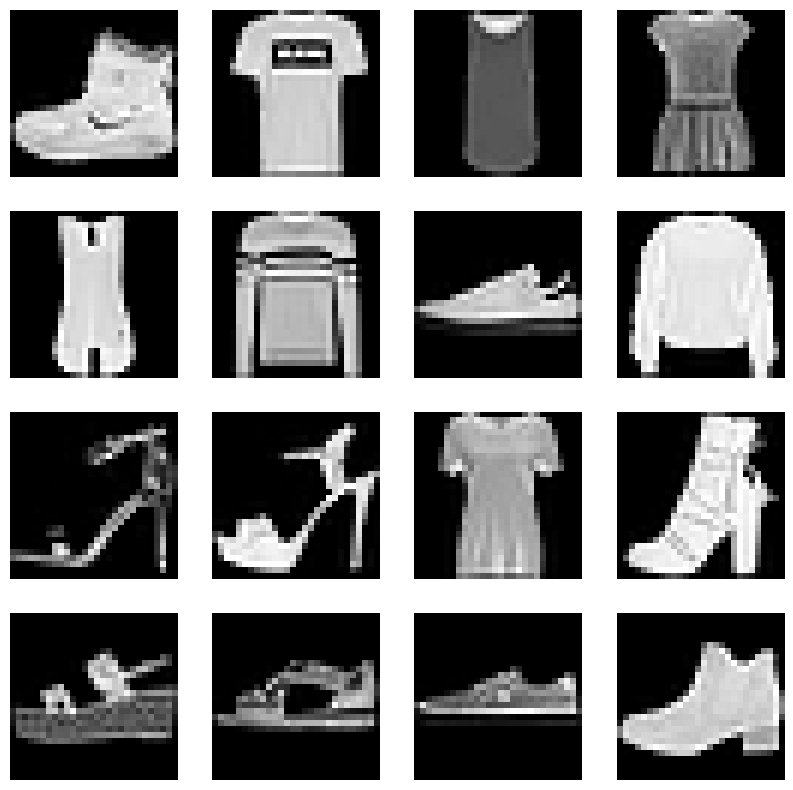

In [4]:
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

# Select the first 16 images from the training set
images = x_train[:16]

# Plot the images in a 4x4 configuration
plt.figure(figsize=(10, 10)) #creates a figure with a width and height of 10 inches. This will ensure that the images are displayed in a large enough size to be easily visible.
for i in range(16): #creates a loop that will iterate 16 times. The loop will index the images in the images array, starting from 0 and ending at 15.
  plt.subplot(4, 4, i + 1) #creates a subplot in the figure. The subplot will have 4 rows and 4 columns, and the current iteration of the loop will determine the index of the subplot.
  plt.imshow(images[i], cmap="gray") #plots image at current index in grayscale
  plt.axis("off") #removes the axis labels from the subplot. This will make the plot look cleaner and more concise.

plt.show()

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

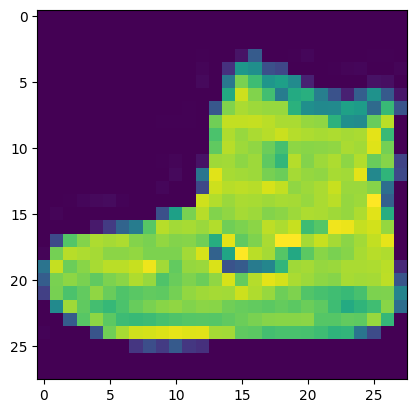

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#You can put between 0 to 59999 here
index=0

#Set number of characters per row when printing
np.set_printoptions(linewidth=320)

#Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

#Visualize the image

plt.imshow(training_images[index])

In [6]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [7]:
# Build the model.
model = tf.keras.models.Sequential([
                  tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)),
                  tf.keras.layers.MaxPooling2D(2,2),
                  tf.keras.layers.Conv2D(128 ,(3,3),activation='relu'),
                  tf.keras.layers.MaxPooling2D(2,2),

                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(10, activation='softmax')
])

#Print summary
model.summary()

#use same settings
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

#Evaluate on the test
print(f'\MODEL EVALUATION:')
test_loss = model.evaluate(test_images,test_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [8]:
#Evaluating model on training images /seen data
model.evaluate(training_images, training_labels)

1875/1875 [==============================] - 37s 20ms/step - loss: 0.1504 - accuracy: 0.9461


[0.15044564008712769, 0.946066677570343]

In [9]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 10s 31ms/step - loss: 0.2500 - accuracy: 0.9133


[0.2500035762786865, 0.9132999777793884]

In [10]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [11]:
print(test_labels[0])
print(test_labels[15])
print(test_labels[35])

9
1
0


In [14]:
import cv2
import numpy as np

# Load the Fashion-MNIST labels
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

# Predict the digit in a new image
# Read the image in grayscale
image = cv2.imread("Shirt3.jpg", 0)

# Reshape the image
image = image.reshape((1, 28, 28))

# Predict the digit in the image
prediction = model.predict(image)

# Get the label for the predicted digit
label = labels[np.argmax(prediction)]

# Print the label
print("The label the image represents is: " + label)
print(image)

1/1 [==============================] - 0s 46ms/step
The label the image represents is: Shirt
[[[  0   0   0   0  15  16  16  16  12  20   0  83 252 251 183   0  20  18  16  17  16  15  17  19   0   0   0   0]
  [  0   0   0   0  15  16  16  15  21  19   0 135 236  82 158   0  19  15  17  16  15  17  15  19   0   0   0   0]
  [  0   0   0   0  15  16  16  15  10  11  12   1  77  78  28   2  17  13  17  15  15  18  14  18   0   0   0   0]
  [  0   0   0   0  15  16  15  15  20  13  13   3  46 135  76   0  16  16  15  16  17  16  17  16   0   0   0   0]
  [  1   0   0   0  15  15  15  15  16  13  18  16  30  46  15  18  16  21  12  18  18  14  22  15   0   0   0   0]
  [  1   0   0   0  15  15  15  14  16  14  20  26  13  11  15  16  19  23  13  16  17  13  22  16   0   0   0   0]
  [  1   0   0   0  15  15  15  14  10  14  37  13  20  22  15  18  22  20  16  12  13  16  17  17   0   0   0   0]
  [  1   0   0   0  15  15  14  14  17   8  26  36  20  18  17  13  25  16  20   9   9  20  12 

In [15]:
import matplotlib.pyplot as plt

history = model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 158s 84ms/step - loss: 0.1545 - accuracy: 0.9415
Epoch 2/5
1875/1875 [==============================] - 137s 73ms/step - loss: 0.1331 - accuracy: 0.9502
Epoch 3/5
1875/1875 [==============================] - 156s 83ms/step - loss: 0.1179 - accuracy: 0.9554
Epoch 4/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.1047 - accuracy: 0.9602
Epoch 5/5
1875/1875 [==============================] - 175s 93ms/step - loss: 0.0922 - accuracy: 0.9651


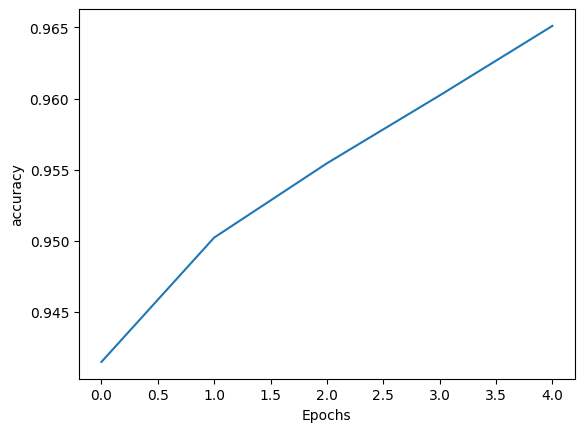

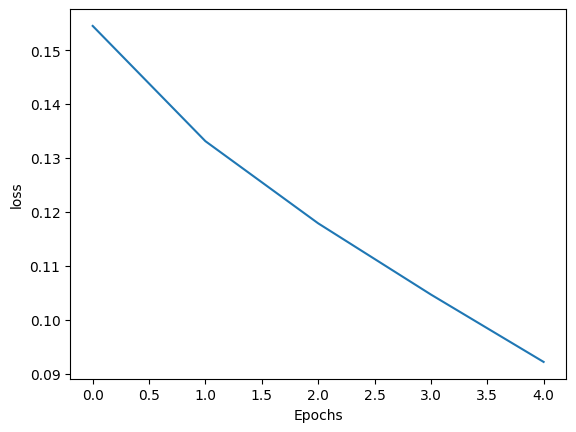

In [16]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])

  plt.xlabel("Epochs")
  plt.ylabel(string)

  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [17]:
model.save('fashion_mnist_object_detection.h5')

c:\Users\Disha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
